# Search based on circles

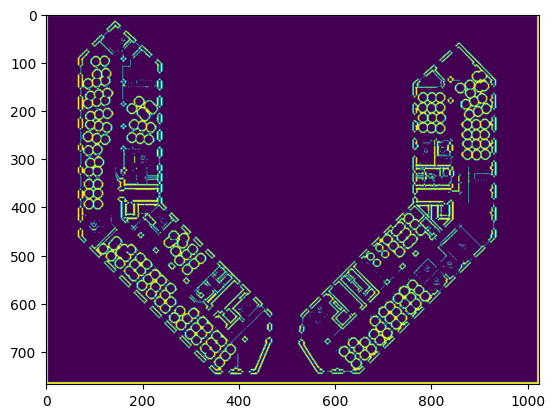

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read image.
import os
import sys
#to get the current working directory
dir_name = os.getcwd()
base_filename='background'
suffix = '.png'
path=os.path.join(dir_name, base_filename + suffix)


img = cv2.imread(path)
blur_hor = cv2.filter2D(img[:, :, 0], cv2.CV_32F, kernel=np.ones((11,1,1), np.float32)/11.0, borderType=cv2.BORDER_CONSTANT)
blur_vert = cv2.filter2D(img[:, :, 0], cv2.CV_32F, kernel=np.ones((1,11,1), np.float32)/11.0, borderType=cv2.BORDER_CONSTANT)
mask = ((img[:,:,0]>blur_hor*1.2) | (img[:,:,0]>blur_vert*1.2)).astype(np.uint8)*255
plt.imshow(mask)

In [ ]:
'''
The most important parameters for your HoughCircles call are:
param1: because you are using cv2.HOUGH_GRADIENT, param1 is the higher threshold for the edge detection algorithm and param1 / 2 is the lower threshold.
param2: it represents the accumulator threshold, so the lower the value, the more circles will be returned.
minRadius and maxRadius: the blue circles in the example have a diameter of roughly 20 pixels, so using 70 pixels for maxRadius is the reason why so many circles are being returned by the algorithm.
minDist: the minimum distance between the centers of two circles.
The parameterization defined below:
'''

In [8]:
circles = cv2.HoughCircles(mask,
                           cv2.HOUGH_GRADIENT,
                           minDist=8,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=4,
                           maxRadius=10)
output = img.copy()
count = 0
for (x, y, r) in circles[0, :, :]:
    print(x,y,r)      
    cv2.circle(output, (int(x), int(y)), int(r), (0, 255, 0), 1)
    count += 1
# show the output image
print('Number of Seats: {}'.format(count))
cv2.imshow("output", np.hstack([output]))
# cv2.imwrite('output.jpg',np.hstack([output]),[cv2.IMWRITE_JPEG_QUALITY, 70])
cv2.waitKey(0)

618.5 699.5 8.2
235.5 596.5 8.2
631.5 711.5 8.2
720.5 480.5 8.2
92.5 209.5 9.4
760.5 561.5 8.2
106.5 122.5 9.4
321.5 506.5 8.2
675.5 694.5 8.2
680.5 663.5 8.2
694.5 648.5 8.2
818.5 193.5 8.2
86.5 185.5 8.2
109.5 306.5 8.2
637.5 681.5 8.2
781.5 193.5 8.2
86.5 253.5 8.2
88.5 393.5 8.2
107.5 371.5 8.2
127.5 163.5 8.2
682.5 636.5 8.2
752.5 423.5 8.2
874.5 249.5 8.2
108.5 394.5 9.4
88.5 352.5 8.2
107.5 352.5 8.2
818.5 172.5 8.2
914.5 195.5 8.2
89.5 228.5 9.4
122.5 96.5 9.4
264.5 457.5 9.4
88.5 372.5 8.2
239.5 552.5 8.2
292.5 530.5 8.2
306.5 518.5 8.2
726.5 643.5 8.2
773.5 572.5 8.2
782.5 234.5 8.2
100.5 97.5 9.4
218.5 235.5 9.4
819.5 237.5 9.4
91.5 169.5 8.2
134.5 502.5 8.2
194.5 257.5 8.2
276.5 511.5 8.2
279.5 645.5 8.2
306.5 620.5 8.2
311.5 676.5 8.2
359.5 723.5 8.2
733.5 492.5 8.2
875.5 269.5 8.2
892.5 249.5 8.2
107.5 280.5 9.4
127.5 235.5 9.4
110.5 207.5 8.2
292.5 632.5 8.2
371.5 709.5 8.2
383.5 695.5 8.2
700.5 618.5 8.2
819.5 214.5 8.2
785.5 585.5 9.4
88.5 326.5 8.2
121.5 179.5 8.2
153

-1

# Search based on color green

In [2]:
#contours_found=seats_coordinates[0]
#get_coordinates_from_countour(contours_found)
def get_coordinates_from_countour(contours_found):
    for c in contours_found:
            if cv2.contourArea(c) <= 50 :
                continue    
            x,y,w,h = cv2.boundingRect(c)
            #cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255,0), 2)
            center = (x,y)
            #print (center)
            return center

In [3]:
import numpy as np
import cv2
import os
dir_name = os.getcwd()
base_filename='background'
suffix = '.png'
path=os.path.join(dir_name, base_filename + suffix)
image = cv2.imread(path)
original = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([0, 208, 94], dtype="uint8")
upper = np.array([179, 255, 232], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

# Find contours
cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Extract contours depending on OpenCV version
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
count = 0
seats_coordinates=[]
# Iterate through contours and filter by the number of vertices 
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)
    if len(approx) > 5:
        cv2.drawContours(original, [c], -1, (36, 255, 12), -1)
        #print([c])
        contours_found = [c]
        coordinates=get_coordinates_from_countour(contours_found)
        print(coordinates)
        seats_coordinates.append([coordinates])
        count += 1
print('Number of Seats : {}'.format(count))
cv2.imshow('mask', mask)
cv2.imshow('original', original)
cv2.imwrite('mask.png', mask)
cv2.imwrite('original.png', original)
cv2.waitKey()


(639, 720)
(355, 718)
(627, 707)
(367, 704)
(657, 702)
(335, 700)
(614, 695)
(378, 691)
(670, 690)
(644, 689)
(326, 689)
(347, 687)
(633, 677)
(338, 677)
(657, 676)
(359, 674)
(688, 671)
(307, 671)
(349, 663)
(676, 659)
(294, 659)
(318, 658)
(703, 657)
(330, 646)
(306, 646)
(690, 644)
(275, 640)
(722, 638)
(320, 634)
(678, 632)
(288, 627)
(733, 626)
(709, 626)
(261, 625)
(301, 616)
(722, 613)
(696, 613)
(273, 611)
(752, 607)
(242, 605)
(709, 602)
(763, 596)
(740, 595)
(254, 592)
(231, 592)
(726, 585)
(752, 583)
(782, 580)
(242, 578)
(213, 575)
(739, 570)
(769, 568)
(254, 564)
(222, 561)
(194, 558)
(756, 557)
(234, 548)
(207, 545)
(177, 538)
(221, 536)
(168, 528)
(191, 527)
(288, 525)
(179, 515)
(204, 514)
(302, 513)
(148, 512)
(272, 506)
(316, 502)
(191, 501)
(160, 498)
(130, 497)
(286, 494)
(150, 490)
(729, 488)
(264, 487)
(171, 484)
(299, 483)
(157, 483)
(113, 482)
(716, 476)
(135, 475)
(747, 470)
(278, 470)
None
None
(141, 467)
(703, 463)
(755, 462)
(281, 460)
(734, 458)
(260, 455)


-1

In [5]:
seats_coordinates[0]

[(639, 720)]

In [6]:
seats_clean = [list(i[0]) for i in seats_coordinates if i[0] is not None]

In [7]:
len(seats_clean)

178

In [8]:
seats_clean[0:2]

[[639, 720], [355, 718]]

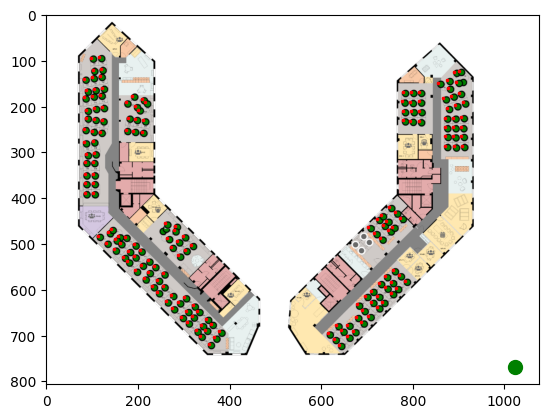

In [9]:
import os
import sys
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
#to get the current working directory
dir_name = os.getcwd()
base_filename='background'
suffix = '.png'
path=os.path.join(dir_name, base_filename + suffix)
image = mpimg.imread(path)
#seats=[[98, 98], [124, 95], [106, 123], [128, 125], [89, 144], [102, 142], [122, 140], [94, 166], [105, 165], [125, 165], [88, 181], [107, 183], [124, 176]]
seats=seats_clean
pts = np.array(seats)
plt.imshow(image)
plt.plot(1024, 768, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=3)
plt.show()

In [11]:
import pickle
with open('seats.pkl', 'wb') as f:
    pickle.dump(seats, f)

In [12]:
import pickle
with open('seats.pkl', 'rb') as f:
    mynewlist = pickle.load(f)